In [1]:
import os
import shutil
import allel
import math
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from scipy import stats
import itertools
import scipy.spatial
import random
from tqdm import tqdm


In [2]:
os.chdir("/master/nplatt/sch_man_nwinvasion")

In [3]:
with open('data/pop_assign.yml') as yaml_file:
    pop_assign = yaml.load(yaml_file, Loader=yaml.FullLoader)

In [4]:
#-------------------------------------------------------------------------------
# get genotype info per population

#read in vcf
filtered_callset=allel.read_vcf('results/variant_filtration/smv7_ex_autosomes.vcf')

#now get an index for each sample/population
samples = filtered_callset["samples"]

i=0
pop_idxs = defaultdict(list)   
for sample in samples:  
    pop_idxs[pop_assign[sample]].append(i) 
    i=i+1

pops= list(pop_idxs.keys()) 

#get genotypes
gt=allel.GenotypeArray(filtered_callset['calldata/GT'])

#now get allele count per population
ac=gt.count_alleles()

pop_ac={}
for pop in pops:
    pop_ac[pop] = gt.count_alleles(subpop=pop_idxs[pop])

In [ ]:
pop_ac.keys()

In [11]:
o_i=pop_idxs["niger"] + pop_idxs["senegal"] + pop_idxs["tanzania"]

NameError: name 'sort' is not defined

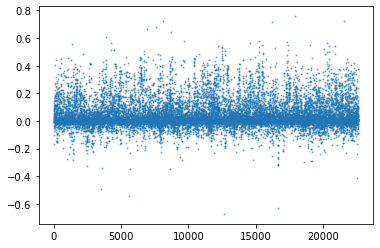

In [41]:
o_i=pop_idxs["brazil"]

b=pop_ac["niger"]
r=pop_ac["tanzania"]
o=gt.count_alleles(subpop=o_i)

pbs=allel.pbs(b, o, r, 21, normed=True)

plt.scatter(x=range(0,len(pbs)),
            y=pbs,
            s=1, alpha=0.5)
plt.show()
plt.close()

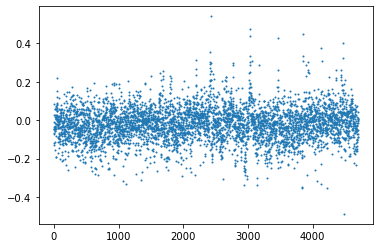

In [28]:
o_i=pop_idxs["niger"] + pop_idxs["senegal"] + pop_idxs["brazil"]

b=pop_ac["tanzania"]
r=pop_ac["rodhaini"]
o=gt.count_alleles(subpop=o_i)

pbs=allel.pbs(b, o, r, 101, normed=True)

plt.scatter(x=range(0,len(pbs)),
            y=pbs,
            s=1)
plt.show()
plt.close()

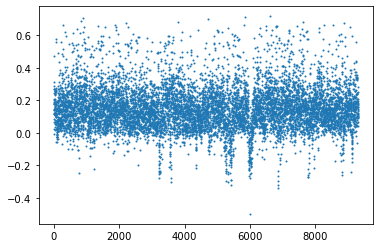

In [18]:
o_i=pop_idxs["niger"] + pop_idxs["tanzania"] + pop_idxs["brazil"]

b=pop_ac["senegal"]
r=pop_ac["rodhaini"]
o=gt.count_alleles(subpop=o_i)

pbs=allel.pbs(b, o, r, 51, normed=True)

plt.scatter(x=range(0,len(pbs)),
            y=pbs,
            s=1)
plt.show()
plt.close()

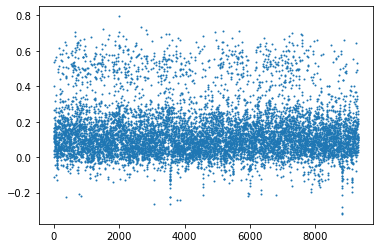

In [19]:
o_i=pop_idxs["senegal"] + pop_idxs["tanzania"] + pop_idxs["brazil"]

b=pop_ac["niger"]
r=pop_ac["rodhaini"]
o=gt.count_alleles(subpop=o_i)

pbs=allel.pbs(b, o, r, 51, normed=True)

plt.scatter(x=range(0,len(pbs)),
            y=pbs,
            s=1)
plt.show()
plt.close()